<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_24_hypothesis_testing_cars_origin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cars = sns.load_dataset('mpg')

# Print the number of unique values for each column
unique_counts = cars.nunique()

# Define a threshold for unique values to classify as categorical
threshold = 10

# Identify columns to convert to categorical
categorical_cols = unique_counts[unique_counts < threshold].index.tolist()

# Convert suitable columns to category
for col in categorical_cols:
    cars[col] = cars[col].astype('category')

# Verify the changes
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.0+ KB
None


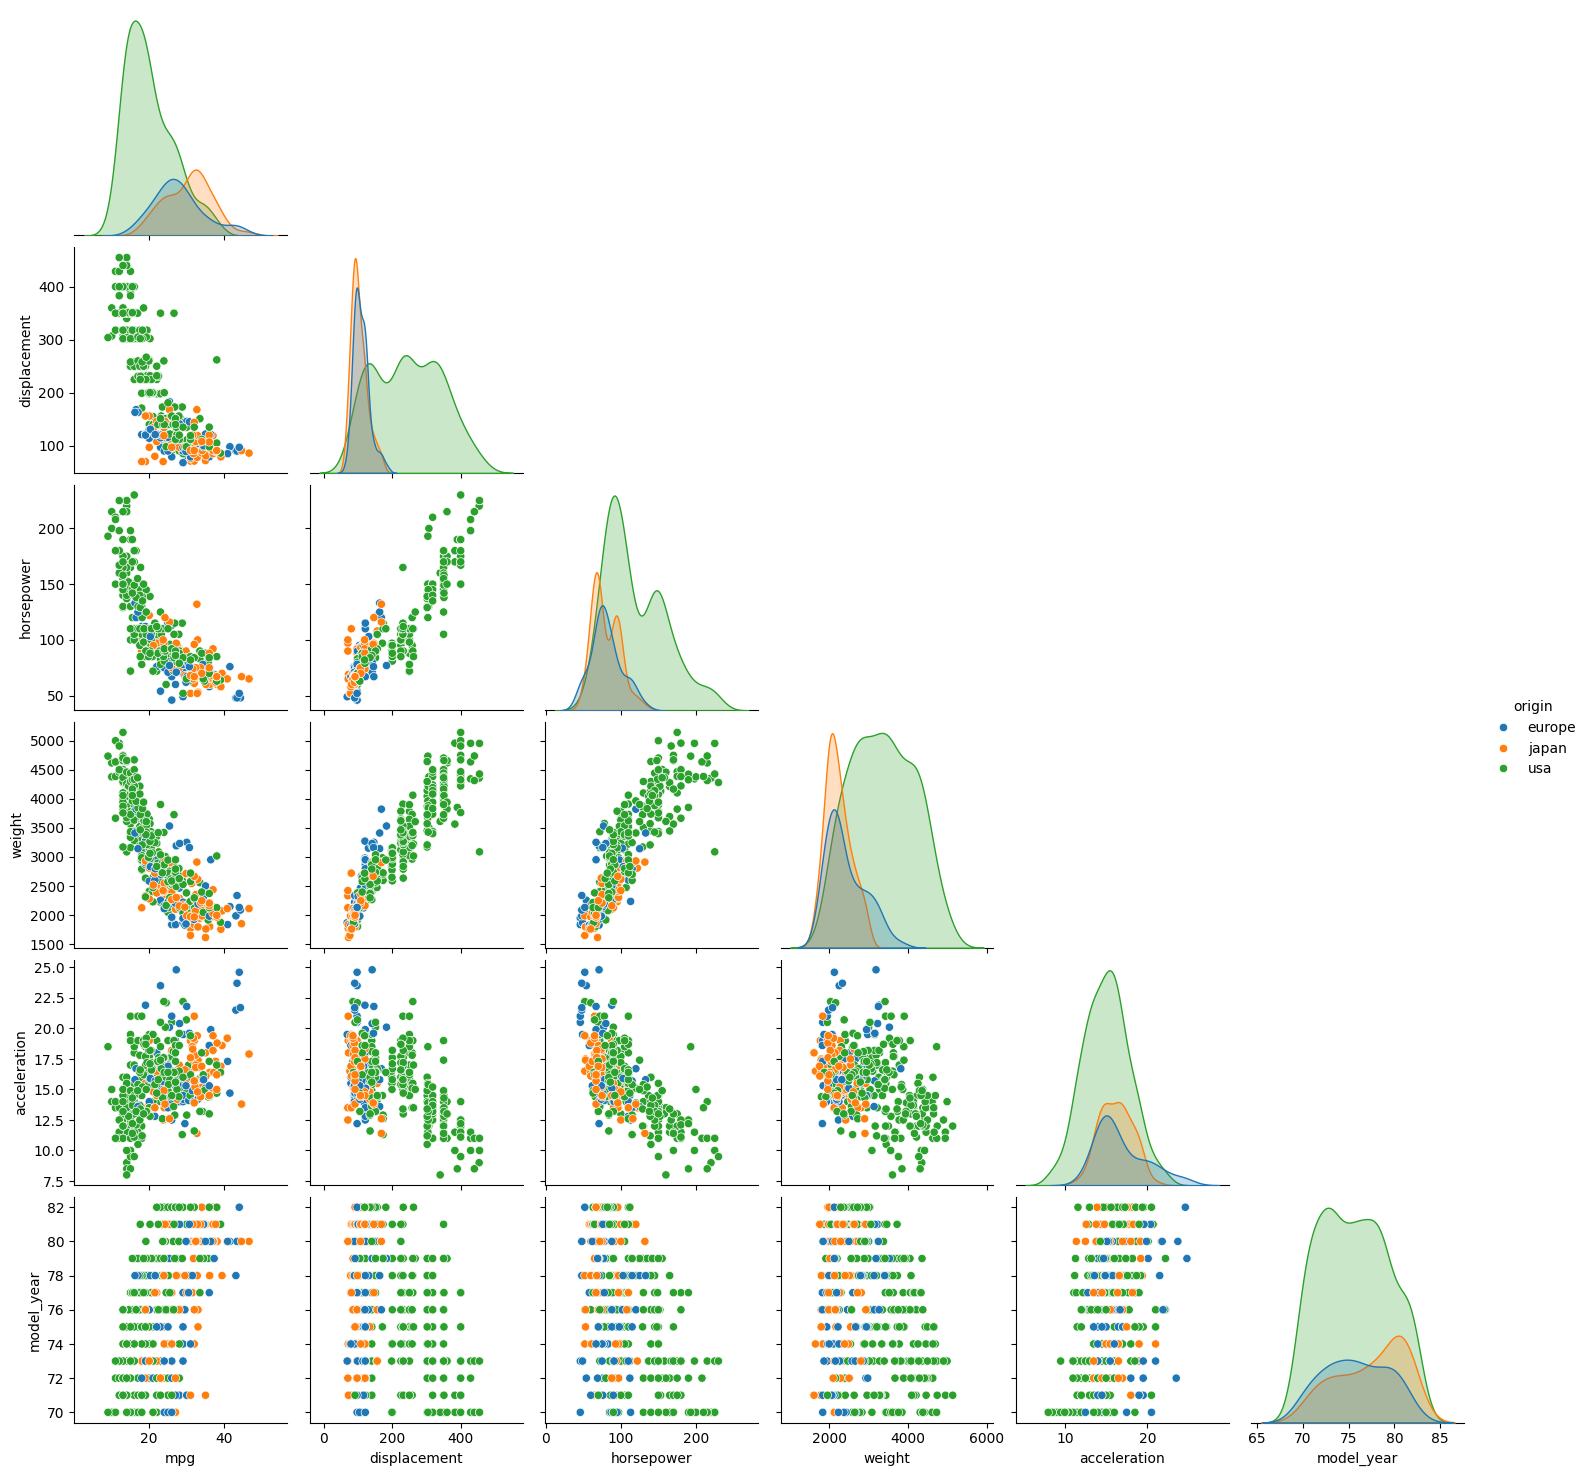

In [8]:
# Create a pairplot
sns.pairplot(cars, diag_kind="kde", hue="origin", corner=True)
plt.show()

### **Question:**
Is the average mileage (mpg) the same for cars from different origins (USA, Europe, Japan)?

---

### **Hypotheses:**

- **Null Hypothesis (H₀):**  
  The mean mileage (mpg) is the same across all origins.  
  H₀: Mean mileage for USA = Mean mileage for Europe = Mean mileage for Japan

- **Alternative Hypothesis (H₁):**  
  At least one origin has a different mean mileage.  
  H₁: At least one origin's mean mileage is different

---

### **Test Plan:**
We will perform a One-Way ANOVA test to compare the means of mileage across the three origins.


In [10]:
import seaborn as sns
import scipy.stats as stats
import pandas as pd

# Load the dataset
cars = sns.load_dataset('mpg')

# Drop rows with missing values in 'mpg' or 'origin'
cars = cars.dropna(subset=['mpg', 'origin'])

# Group the data by origin
usa_mpg = cars[cars['origin'] == 'usa']['mpg']
europe_mpg = cars[cars['origin'] == 'europe']['mpg']
japan_mpg = cars[cars['origin'] == 'japan']['mpg']

# Perform a One-Way ANOVA test
f_stat, p_value = stats.f_oneway(usa_mpg, europe_mpg, japan_mpg)

# Print the results
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: At least one group has a different mean mileage.")
else:
    print("Fail to Reject the Null Hypothesis: The mean mileage is the same across all origins.")

F-Statistic: 98.54
P-Value: 0.0000
Reject the Null Hypothesis: At least one group has a different mean mileage.


### **Results Interpretation:**

1. **F-Statistic: 98.54**
   - The **F-statistic** is a ratio that measures the variation between group means relative to the variation within groups. A larger F-statistic indicates that the group means are significantly different compared to the variability within the groups.

2. **P-Value: 0.0000**
   - The p-value is extremely small (practically 0), which means the probability of observing such a large F-statistic under the null hypothesis is essentially zero.
   - With a significance level (\(\alpha = 0.05\)), the p-value is much smaller than 0.05.

3. **Decision:**
   - Since the p-value is smaller than the significance level (\(\alpha = 0.05\)), we **reject the null hypothesis (H₀)**.
   - This means there is strong evidence that **at least one group (origin)** has a significantly different mean mileage (mpg).

4. **Conclusion:**
   - The test indicates that the average mileage differs across at least one of the origins (USA, Europe, or Japan).
   - However, ANOVA doesn’t tell us *which* groups differ; it only tells us that a difference exists.

---

### **Next Steps:**
To determine **which groups have significantly different means**, we can perform a **post-hoc test**, such as **Tukey’s HSD (Honestly Significant Difference)**. Tukey's test will compare all pairs of groups and tell us which ones are significantly different.


### 1. **Variation Between Group Means**
This refers to how different the group means (USA, Europe, Japan) are from the **overall mean** of the data. In simpler terms:
- Imagine we calculate the mean `mpg` for each group (`USA`, `Europe`, `Japan`).
- Then, compare these group means to the **overall mean mileage** across all cars.
- If the group means are very far apart, it suggests that the origin has a strong effect on mileage.

This "between-group variation" tells us how much of the overall variability in mileage can be attributed to differences **between the groups** (i.e., the effect of `origin`).

---

### 2. **Variation Within Groups**
This measures how much the data varies **inside each group**. In other words:
- Look at the `mpg` values for all cars from `USA`, for example.
- Compute how much the individual `mpg` values deviate from the mean `mpg` of `USA`.
- Repeat this for `Europe` and `Japan`.

If the individual `mpg` values within a group vary widely, the **within-group variation** will be large. On the other hand, if cars in each group have similar `mpg` values, the within-group variation will be small.

---

### 3. **F-Statistic as a Ratio**
The F-statistic compares these two variations:
\[
F = \frac{\text{Between-Group Variation}}{\text{Within-Group Variation}}
\]

- **When the F-statistic is large**: This means that the group means are very far apart (large between-group variation) compared to the variability within the groups (small within-group variation). This suggests the groups are likely **significantly different**.
- **When the F-statistic is small**: This means that the group means are close together (small between-group variation) relative to the spread within the groups (large within-group variation). This suggests the groups are likely **not significantly different**.

---

### 4. **In Context of the Cars Dataset**
- **Between-Group Variation**: The difference in average `mpg` among cars from `USA`, `Europe`, and `Japan`. If one origin (e.g., Japan) has much higher mileage than the others, the between-group variation will be large.
- **Within-Group Variation**: The spread of `mpg` values for cars within each origin. If cars from `USA` have very similar `mpg` values, the within-group variation for `USA` will be small.

In this case:
- The F-statistic was **98.54**, a very large value.
- This indicates that the differences in average `mpg` between `USA`, `Europe`, and `Japan` are much larger than the variation within each group.
- Hence, it’s strong evidence that the means are not equal.

---

### Visualization Idea:
A boxplot or KDE plot visually highlights these differences:
- If the group means are far apart (e.g., boxplots or peaks in KDE plots are separated), the between-group variation is large.
- If the spread of values within each group is narrow, the within-group variation is small.


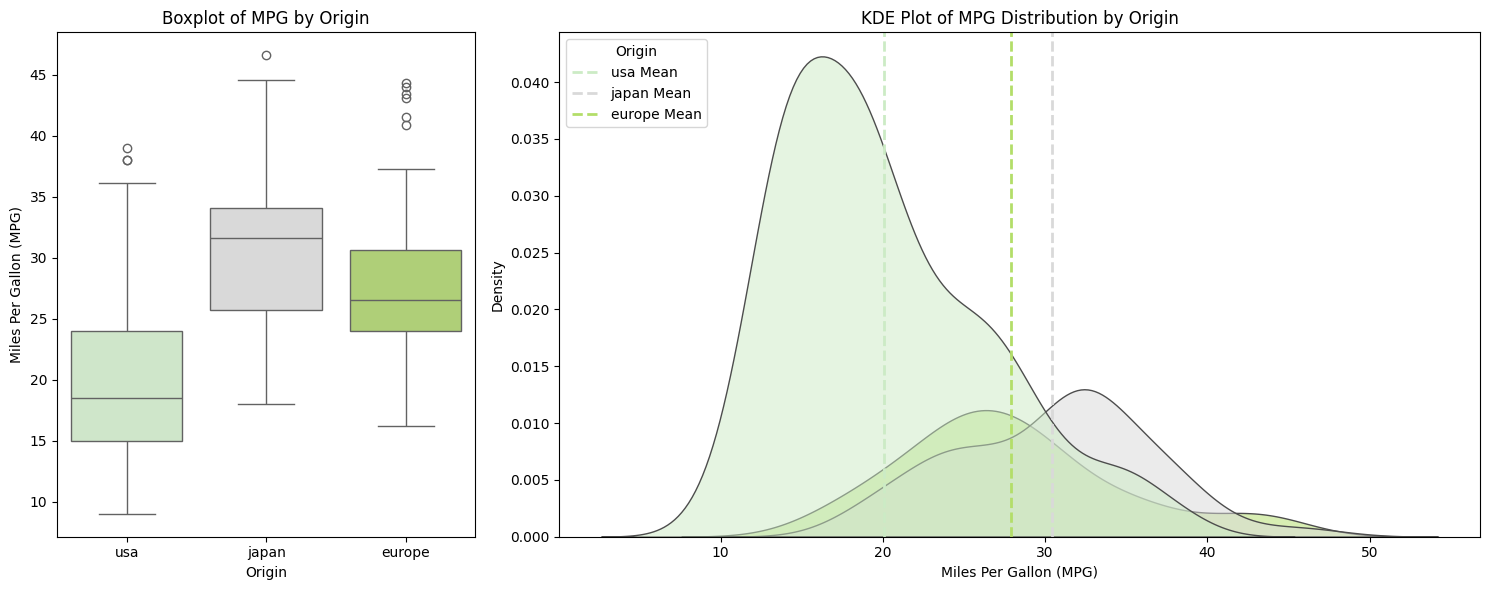

In [19]:
# Set up the figure with gridspec to divide into 1/3 and 2/3
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 3, width_ratios=[1, 2, 0])  # Third column is a placeholder

# Define the color palette and select the first 3 colors
palette = sns.color_palette("Set3_r")[:3]

# Plot 1: Boxplot (1/3 of the space)
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=cars, x="origin", y="mpg", hue="origin", palette=palette, ax=ax1)
ax1.set_title("Boxplot of MPG by Origin")
ax1.set_ylabel("Miles Per Gallon (MPG)")
ax1.set_xlabel("Origin")

# Plot 2: KDE plot (2/3 of the space)
ax2 = fig.add_subplot(gs[1:])
sns.kdeplot(data=cars, x="mpg", hue="origin", fill=True, palette=palette, alpha=0.5, ax=ax2, edgecolor="0.3")

# Add mean lines for each origin
for origin, color in zip(cars['origin'].unique(), palette):
    mean_mpg = cars[cars['origin'] == origin]['mpg'].mean()
    ax2.axvline(mean_mpg, color=color, linestyle="--", linewidth=2, label=f"{origin} Mean")

ax2.set_title("KDE Plot of MPG Distribution by Origin")
ax2.set_xlabel("Miles Per Gallon (MPG)")
ax2.set_ylabel("Density")

# Adjust the legend to avoid overlapping
ax2.legend(title="Origin", loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()




### **Tukey HSD Results Interpretation:**

1. **Europe vs Japan:**
   - **Mean Difference (meandiff):** 2.5592  
     - The mean `mpg` for cars from **Japan** is higher than that of cars from **Europe** by approximately 2.56 miles per gallon.
   - **p-adj (Adjusted p-value):** 0.0404  
     - This is less than 0.05, indicating the difference is statistically significant.
   - **Confidence Interval (lower = 0.0877, upper = 5.0307):**  
     - The confidence interval does not include 0, confirming a significant difference.
   - **Conclusion:** Cars from Japan have significantly higher mileage than cars from Europe.

---

2. **Europe vs USA:**
   - **Mean Difference (meandiff):** -7.8079  
     - The mean `mpg` for cars from **USA** is lower than that of cars from **Europe** by approximately 7.81 miles per gallon.
   - **p-adj (Adjusted p-value):** 0.0  
     - This is much less than 0.05, indicating the difference is highly significant.
   - **Confidence Interval (lower = -9.8448, upper = -5.771):**  
     - The confidence interval is entirely negative, confirming the significant difference.
   - **Conclusion:** Cars from the USA have significantly lower mileage than cars from Europe.

---

3. **Japan vs USA:**
   - **Mean Difference (meandiff):** -10.3671  
     - The mean `mpg` for cars from **USA** is lower than that of cars from **Japan** by approximately 10.37 miles per gallon.
   - **p-adj (Adjusted p-value):** 0.0  
     - This is much less than 0.05, indicating the difference is highly significant.
   - **Confidence Interval (lower = -12.3114, upper = -8.4228):**  
     - The confidence interval is entirely negative, confirming the significant difference.
   - **Conclusion:** Cars from the USA have significantly lower mileage than cars from Japan.

---

### **Final Summary:**
1. **USA has the lowest mean mileage (mpg)** compared to both Europe and Japan, and the differences are highly significant.
2. **Japan has the highest mean mileage**, significantly higher than both Europe and the USA.
3. The mean mileage of cars from **Europe** is between that of Japan and the USA, and it is significantly lower than Japan but significantly higher than the USA.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
europe  japan   2.5592 0.0404   0.0877  5.0307   True
europe    usa  -7.8079    0.0  -9.8448  -5.771   True
 japan    usa -10.3671    0.0 -12.3114 -8.4228   True
-----------------------------------------------------


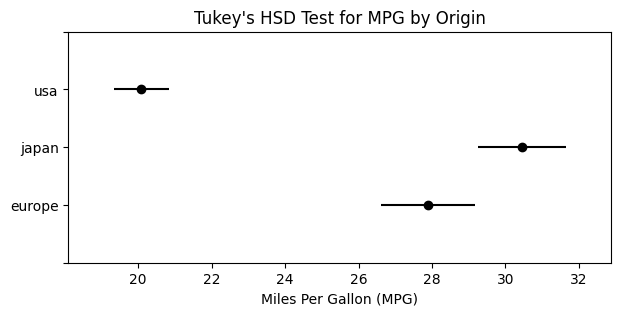

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=cars['mpg'], groups=cars['origin'], alpha=0.05)

# Print the results
print(tukey)

# Optional: Visualize the results
tukey.plot_simultaneous(figsize=(7,3))
plt.title("Tukey's HSD Test for MPG by Origin")
plt.xlabel("Miles Per Gallon (MPG)")
plt.show()

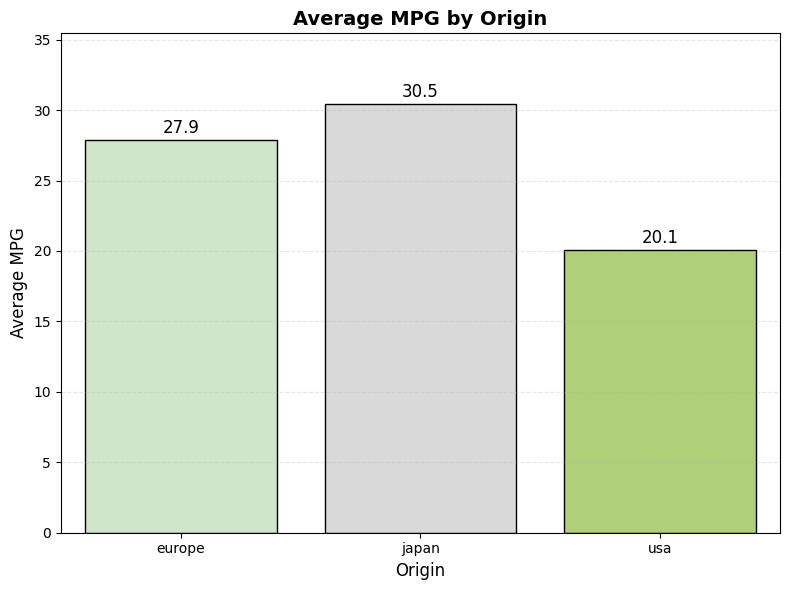

In [52]:
# Calculate the means
data = cars.groupby('origin')['mpg'].mean().to_frame().reset_index()

# Define the palette
palette = sns.color_palette("Set3_r")[:3]

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='origin', y='mpg', hue='origin', palette=palette, edgecolor='black')

# Add data labels
for index, row in data.iterrows():
    plt.text(x=index, y=row['mpg'] + 0.5, s=f"{row['mpg']:.1f}", ha='center', fontsize=12)

# Add titles and labels
plt.title('Average MPG by Origin', fontsize=14, weight='bold')
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Average MPG', fontsize=12)
plt.ylim(0, data['mpg'].max() + 5)  # Adjust the y-axis to make room for labels

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()
